# Compare Spectral Fitting

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.fake import SimFits, print_res
from apm.core.db import APMDB
from apm.core.io import load_pickle
from apm.plts.fake import violin_errors, boxplot_errors
from apm.plts.utils import color_red_or_green

### Settings

In [3]:
# Notebook Settings
SAVE_FIG = False

In [4]:
# Set up project database object
db = APMDB()

In [5]:
# Check available simualted model fit files
sim_files = db.check_files('sims')

In [6]:
# Collect all fits together
all_fits = SimFits()
all_fits.get_fit_funcs()
all_fits.get_err_dict(0)

for f_name in sim_files:

    data = load_pickle(f_name, db.sims_path)

    temp = SimFits()
    temp.errs = data
    
    all_fits = all_fits + temp

In [7]:
# Check how many PSDs are included in simulated data model fits
print(len(all_fits.errs['RAN-EA']))

50


In [8]:
# Check the average errors per method
print_res(all_fits.calc_avg_errs(avg='median'))

   RAN      		 0.01631
   RLM-EO   		 0.02156
   OLS-EO   		 0.02282
   EXP-EO   		 0.02282
   FOOOF    		 0.02331
   RLM      		 0.02386
   RAN-EO   		 0.02607
   RLM-EA   		 0.02644
   OLS-EA   		 0.02734
   EXP-EA   		 0.02734
   RAN-EA   		 0.02895
   OLS      		 0.02906
   EXP      		 0.02906


In [9]:
# Check the number of fits that pass a threshold, per method
print_res(all_fits.calc_perc_good(thresh=0.025))

   RAN      		 0.60000
   FOOOF    		 0.56000
   RLM-EO   		 0.54000
   RLM      		 0.54000
   OLS-EO   		 0.54000
   EXP-EO   		 0.54000
   RLM-EA   		 0.48000
   RAN-EO   		 0.48000
   OLS      		 0.48000
   EXP      		 0.48000
   RAN-EA   		 0.46000
   OLS-EA   		 0.44000
   EXP-EA   		 0.44000


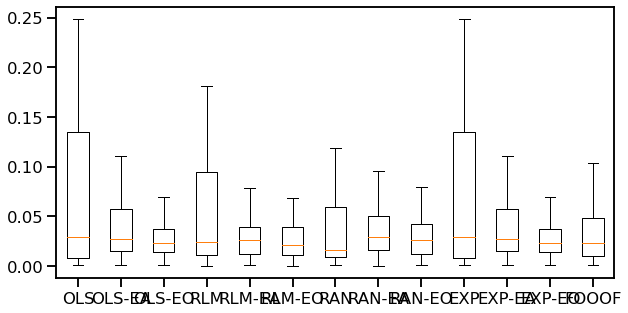

In [10]:
# Create boxplot of errors
boxplot_errors(all_fits.errs)

In [11]:
mains = ['OLS', 'RLM', 'RAN', 'EXP', 'FOOOF']
alphas = ['OLS-EA', 'RLM-EA', 'RAN-EA', 'EXP-EA', 'FOOOF']
oscs = ['OLS-EO', 'RLM-EO', 'RAN-EO', 'EXP-EO', 'FOOOF']

In [12]:
main_dicts = {label : all_fits.errs[label] for label in mains}
alphas_dicts = {label : all_fits.errs[label] for label in alphas}
oscs_dicts = {label : all_fits.errs[label] for label in oscs}

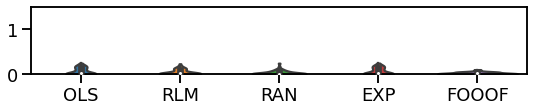

In [13]:
violin_errors(main_dicts, ylim=[0, 1.5])

if SAVE_FIG:
    plt.savefig(db.make_fig_name('SpectralFitting-Main', file_type='pdf')) 

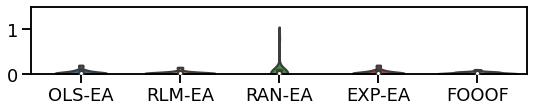

In [14]:
violin_errors(alphas_dicts, ylim=[0, 1.5])

if SAVE_FIG:
    plt.savefig(db.make_fig_name('SpectralFitting-EA', file_type='pdf'))

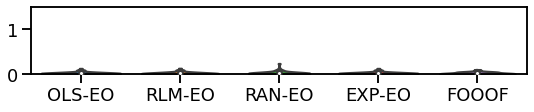

In [15]:
violin_errors(oscs_dicts, ylim = [0, 1.5])

if SAVE_FIG:
    plt.savefig(db.make_fig_name('SpectralFitting-EO', file_type='pdf'))

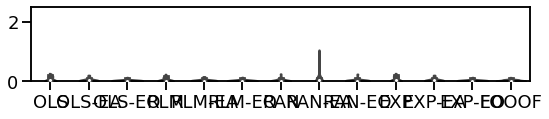

In [16]:
# Violin plot of error distributions
ax = violin_errors(all_fits.errs, ylim=[0, 2.5])

#if SAVE_FIG:
#    plt.savefig(db.make_fig_name('violin_plot', file_type='pdf'))

## Statistically Compare Methods

In [17]:
# Run comparisons between methods
comps = all_fits.comp_errs()

In [19]:
# Print out color-coded dataframe of comparison results
df = pd.DataFrame(comps, index=all_fits.errs.keys(), columns=all_fits.errs.keys())
df.style.applymap(color_red_or_green)

,OLS,OLS-EA,OLS-EO,RLM,RLM-EA,RLM-EO,RAN,RAN-EA,RAN-EO,EXP,EXP-EA,EXP-EO,FOOOF
OLS,1.000000,0.567195,0.122536,0.525930,0.235726,0.078760,0.110507,0.557893,0.214647,0.983500,0.567195,0.122536,0.055304
OLS-EA,0.567195,1.000000,0.147700,0.912171,0.341428,0.115999,0.178853,0.903975,0.344938,0.567195,0.978001,0.147700,0.114408
OLS-EO,0.122536,0.147700,1.000000,0.288395,0.654082,0.732920,0.777448,0.209597,0.656572,0.122536,0.147700,0.978001,0.868588
RLM,0.525930,0.912171,0.288395,1.000000,0.530438,0.192598,0.225010,0.983500,0.452396,0.525930,0.912171,0.288395,0.163755
RLM-EA,0.235726,0.341428,0.654082,0.530438,1.000000,0.530438,0.571874,0.400322,0.956019,0.235726,0.341428,0.654082,0.534966
RLM-EO,0.078760,0.115999,0.732920,0.192598,0.530438,1.000000,0.923113,0.132877,0.486256,0.078760,0.115999,0.735516,0.934070
RAN,0.110507,0.178853,0.777448,0.225010,0.571874,0.923113,1.000000,0.235726,0.590772,0.117607,0.178853,0.777448,0.782738
RAN-EA,0.557893,0.903975,0.209597,0.983500,0.400322,0.132877,0.235726,1.000000,0.415948,0.557893,0.906706,0.209597,0.212111
RAN-EO,0.214647,0.344938,0.656572,0.452396,0.956019,0.486256,0.590772,0.415948,1.000000,0.214647,0.344938,0.674103,0.586021
EXP,0.983500,0.567195,0.122536,0.525930,0.235726,0.078760,0.117607,0.557893,0.214647,1.000000,0.567195,0.122536,0.055304
